#Исследование размеров тренировочных изображений

In [ ]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import gdown
import os

In [ ]:
#  Загружаем, распаковываем, удаляем train.zip.
if not os.path.exists('train'):
    if not os.path.exists('train.zip'):
        train_zip_url = 'https://drive.google.com/uc?id=1QdhIxh1QUEuLgRb7DWa7RA7CA08ybNRJ'
        gdown.download(train_zip_url, 'train.zip', False)
    ! unzip train.zip -d .
    ! rm train.zip

In [ ]:
# Собираем коллекцию путей до каждого изображения в train директории,
# попутно считая общее количество изображений.
train_path = 'train'
im_paths =  ! find $train_path -type f
print(f'Количество тренеровочных изображений: {len(im_paths)}')

Количество тренеровочных изображений: 50046


In [ ]:
# Соберём списки для ширин и высот по всем изображениям
ws = [] # список ширин
hs = [] # список высот
for path in im_paths:
    im = PIL.Image.open(path)
    width, height = im.size
    ws.append(width)
    hs.append(height)

Минимальная ширина: 133
Максимальная ширина: 4689



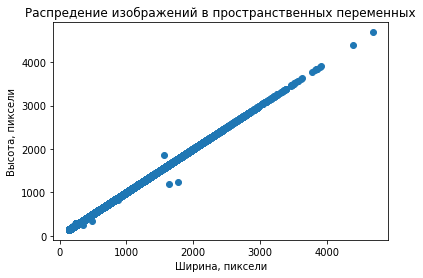

In [ ]:
plt.scatter(ws,hs)
plt.title('Распредение изображений в пространственных переменных')
plt.xlabel('Ширина, пиксели')
_ = plt.ylabel('Высота, пиксели')
print(f'Минимальная ширина: {min(ws)}')
print(f'Максимальная ширина: {max(ws)}\n')

Глядя на график можно сказать следующее:

1.   Почти все изображения квадратные
2.   Наблюдается большой разброс в размерах изображений

Посмотрим на распределение изображений по пространственным размерам. Для этого построим столбчатую диаграмму.

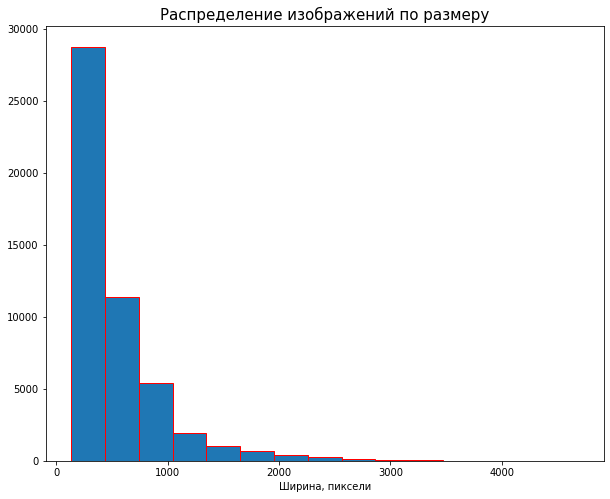

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(ws, edgecolor='red', bins=15)
plt.xlabel('Ширина, пиксели')
_ = plt.title('Распределение изображений по размеру', size = 15)

Из распределения видно, что бОльшая часть изображений имеет пространственные размеры меньшие чем 1000х1000.
Также очевидно, что в распределении присутствуют выбросы. Визуально можно оценить, что их значения лежать за порогом в 3000 пикселей. Другими словами, мы можем сказать что изображения, которые имеют размеры большее 3000х3000 можно считать выбрасами. Но не будем глословными и найдём процент таких изображений:



In [ ]:
tail = [w for w in ws if w > 3000]
print(f'Процент изображений, чей размер больше 3000х3000: {len(tail)/len(im_paths)*100}')

Процент изображений, чей размер больше 3000х3000: 0.16384925868201256


Поскольку таких изображений мало и они находятся "вдали" от основной группы (область от 0 до 1000), то будем считать их выбрасами. Т.о. при недостаточной точности предсказания модели, мы сможет попробовать исключить такие изображения из тренеровочной выборки.

Теперь найдём медианное значение ширины. Эта информация будет полезной при решении вопроса о размере входного тензора в модель.

In [ ]:
np.median([w for w in ws if w not in tail])

370.0

Т.о. половина изображений из ~ 50 000 имеет размер до 370х370